# Geographic Segmentation

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

# Charging Stations on Highways:

**This data talks about the number of charging stations installed on some major highways connecting one state to another or within one state itself.**

In [2]:
cs_highway = pd.read_csv("CS_Highway.csv")

In [3]:
cs_highway

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Chennai- Nagpur,114
9,Total,Total,708


In [4]:
cs_highway = cs_highway.iloc[:-1,:] # discarding the last row

# Sanctioned Charging Stations:

In [5]:
cs_sanctioned = pd.read_csv("CS_Sanctioned.csv")

In [6]:
cs_sanctioned

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


In [7]:
cs_sanctioned = cs_sanctioned.iloc[:-1,:] # discarding the last row

# Different fuel type used for a number of vehicles:

- Electric(BOV) : Battery Operated Vehicle

In [8]:
def get_data(df):
    """
    This function helps to get the required data
    """
    d_mh = pd.read_excel(df, skiprows=[0, 1])  # skipping first 2 rows
    d_mh = d_mh.iloc[1:, [1, 0, 2, 3, 4]]  # select columns by index positions
    d_mh.columns = ["Vehicle Class", "CNG ONLY", "DIESEL", "ELECTRIC(BOV)", "PETROL"]  # set column names
    return d_mh


In [9]:
get_data("type_maharashtra.xlsx")

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
1,ADAPTED VEHICLE,1.0,0,421,8
2,AGRICULTURAL TRACTOR,2.0,0,"6,61,896",18
3,AMBULANCE,3.0,35,"10,347",3
4,ANIMAL AMBULANCE,4.0,1,17,0
5,ARTICULATED VEHICLE,5.0,0,"31,174",1
...,...,...,...,...,...
67,VEHICLE FITTED WITH COMPRESSOR,67.0,0,370,0
68,VEHICLE FITTED WITH GENERATOR,68.0,4,"2,380",0
69,VEHICLE FITTED WITH RIG,69.0,0,"1,143",0
70,VINTAGE MOTOR VEHICLE,70.0,0,19,0


- This is how the raw data looks like

**The data contains all type of vehicles, but here we are focussing on only the following types:**

- BUS
- E-RICKSHAW(P)
- M-CYCLE/SCOOTER
- M-CYCLE/SCOOTER-WITH SIDE CAR
- MOPED
- MOTOR CAB
- MOTOR CAR
- OMNI BUS
- THREE WHEELER (GOODS)
- THREE WHEELER (PASSENGER)
- THREE WHEELER (PERSONAL)
- E-RICKSHAW WITH CART (G)

In [10]:
# list of main vehicle spaces to target
imp_vehicle = ["BUS", "E-RICKSHAW(P)","M-CYCLE/SCOOTER","M-CYCLE/SCOOTER-WITH SIDE CAR","MOPED","MOTOR CAB","MOTOR CAR",
               "OMNI BUS","THREE WHEELER (GOODS)","THREE WHEELER (PASSENGER)","THREE WHEELER (PERSONAL)",
               "E-RICKSHAW WITH CART (G)"]

# Data Visualization:

# Charging stations on highway:

In [11]:
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    """
    This function helps to plot the bar plot for various features
    
    """
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()           

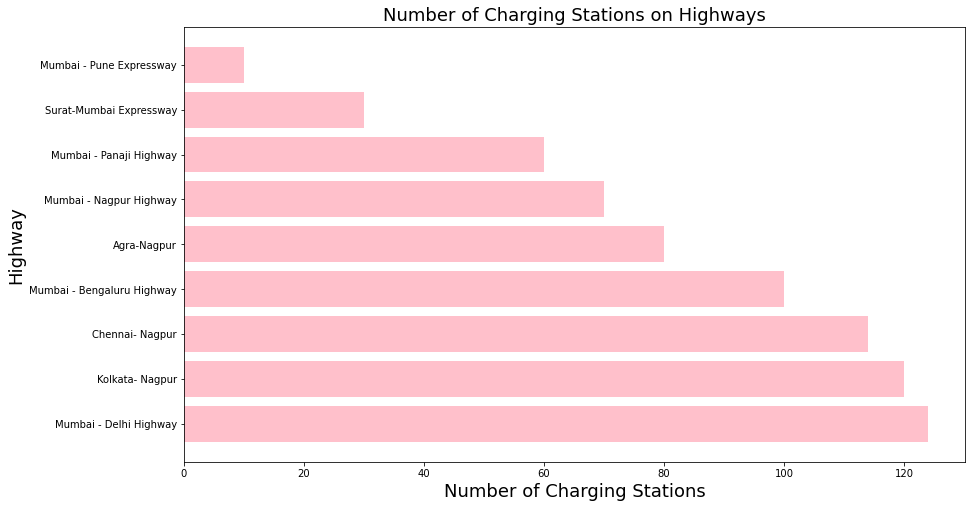

In [12]:
plot_frequency(cs_highway,"Highways/Expressways","Charging Stations", "Number of Charging Stations",
               "Highway","Number of Charging Stations on Highways",'pink')

**Based on number of charging stations, the following city / state could be targeted**

- Mumbai (Maharashtra)
- Nagpur (Maharashtra)
- Delhi
- Bengaluru (Karnataka)
- Agra (Uttar Pradesh)

# Sanctioned Charging Stations:

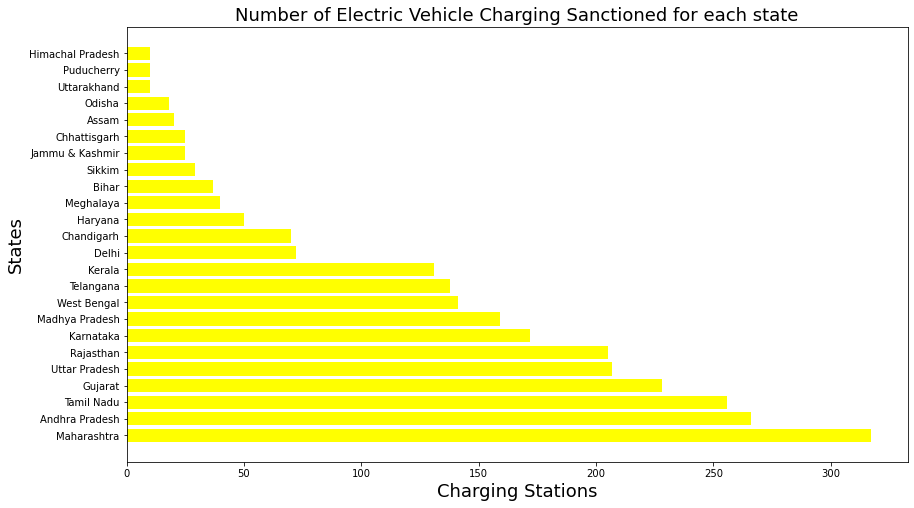

In [13]:
plot_frequency(cs_sanctioned,'State/UT-wise','Number of Electric Vehicle Charging Sanctioned','Charging Stations','States',
               'Number of Electric Vehicle Charging Sanctioned for each state','yellow')

**States to target based on charging stations sanctioned**

- Maharashtra
- Andhra Pradesh
- Tamil Nadu
- Gujarat
- Uttar Pradesh
- Rajasthan
- Karnataka

# Integrating data for EV of all states:

In [14]:
def get_all_data(state,state_name):
    """
    This function combines the data for electric vehicle across all states
    
    """
    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame['State'] = [state_name for i in range(new_frame.shape[0])]
    return new_frame[["Vehicle Class","ELECTRIC(BOV)","State"]]

In [15]:
# list of name of csv files of every state
data_files = ["type_AP.xlsx","type_assam.xlsx","type_bihar.xlsx","type_chandigarh.xlsx","type_chhatisgarh.xlsx",
              "type_Delhi.xlsx","type_guj.xlsx","type_haryana.xlsx","type_HP.xlsx","type_jammu.xlsx","type_karnataka.xlsx",
              "type_kerala.xlsx","type_maharashtra.xlsx","type_meghalaya.xlsx","type_MP.xlsx","type_odisha.xlsx",
              "type_puducherry.xlsx","type_rajasthan.xlsx","type_sikkim.xlsx","type_TN.xlsx","type_UP.xlsx",
              "type_uttarakhand.xlsx","type_WB.xlsx"]

In [16]:
# list of state names, these will be column values
states = ["Andhra Pradesh","Assam","Bihar","Chandigarh","Chhatisgarh","Delhi","Gujarat","Haryana","Himachal Pradesh",
         "Jammu & Kashmir","Karnataka","Kerala","Maharashtra","Meghalaya","Madhya Pradesh","Odisha","Puducherry",
          "Rajasthan","Sikkim","Tamil Nadu","Uttar Pradesh","Uttarakhand","West Bengal"]

In [17]:
# storing each dataframe to concatenate in the below list
concat_states = []
for i,j in zip(data_files,states):
    concat_states.append(get_all_data(i,j)) # calling the above defined function

In [18]:
final_df = pd.concat(concat_states,axis = 0) # concatenating all the dataframes (by rows)

In [19]:
final_df

,Vehicle Class,ELECTRIC(BOV),State
0,BUS,10872.0,Andhra Pradesh
1,E-RICKSHAW(P),0.0,Andhra Pradesh
2,E-RICKSHAW WITH CART (G),0.0,Andhra Pradesh
3,M-CYCLE/SCOOTER,4492.0,Andhra Pradesh
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,Andhra Pradesh
...,...,...,...
7,MOTOR CAR,329606.0,West Bengal
8,OMNI BUS,20843.0,West Bengal
9,THREE WHEELER (GOODS),55927.0,West Bengal
10,THREE WHEELER (PASSENGER),23827.0,West Bengal


In [20]:
#final_df.to_csv("All_Data.csv")

In [21]:
mean_ev = final_df.groupby(by = "State").mean() # group by each state and return the average number of EV being used

# Average number of electric vehicles across all states

<AxesSubplot:title={'center':'Mean of Electric Vehicles'}, ylabel='State'>

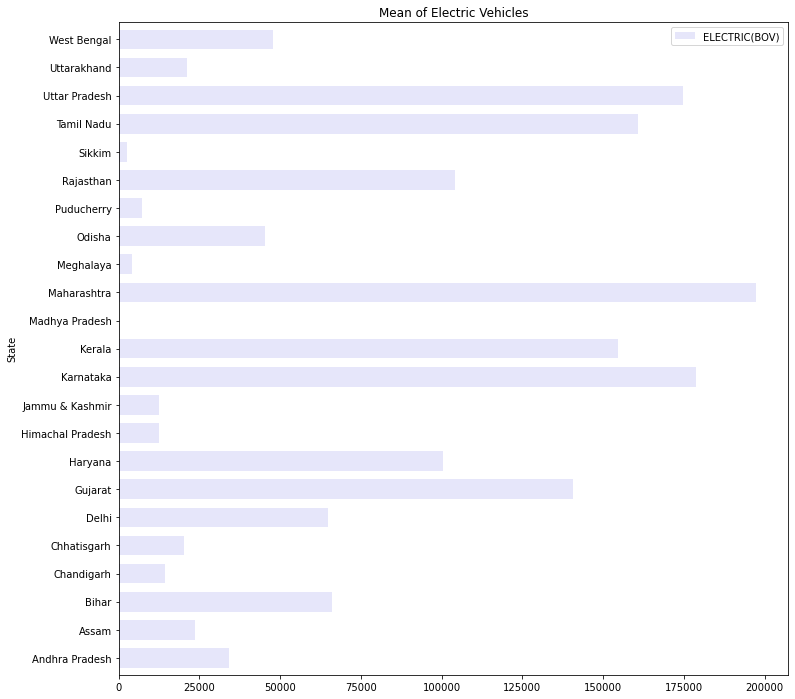

In [22]:
mean_ev.plot.barh(figsize = (12,12), width = 0.7,title = 'Mean of Electric Vehicles', color = 'lavender')

**States to target :**
- Maharashtra
- Uttar Pradesh
- Karnataka
- Gujarat
- Delhi
- Rajasthan
- Haryana

# Vehicle Class wise fuel data:

In [23]:
def get_imp_vehicle(state):
    """
    This function returns the dataframe with important fuel types and rows containing the
    vehicle spaces to target
    
    """
    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    df = frame.reset_index().drop(["index"], axis=1)
    
    # cleaning the numerical features (Example : 12,200 is converted to 12200)
    
    df["CNG ONLY"] = [str(z).replace(",", "") for z in df["CNG ONLY"].values]
    df["DIESEL"] = [str(z).replace(",", "") for z in df["DIESEL"].values]
    df["ELECTRIC(BOV)"] = [str(z).replace(",", "") for z in df["ELECTRIC(BOV)"].values]
    df["PETROL"] = [str(z).replace(",", "") for z in df["PETROL"].values]
    
    # the numerical features are string type, so converting them to float
    
    df["CNG ONLY"] = df["CNG ONLY"].astype(float)
    df["DIESEL"] =  df["DIESEL"].astype(float)
    df["ELECTRIC(BOV)"] = df["ELECTRIC(BOV)"].astype(float)
    df["PETROL"] = df["PETROL"].astype(float)
        
    return df

# Visualizing the type of fuel used for every vehicle class & which vehicle space uses Battery operated fuel (EV)

# Maharashtra

In [24]:
mh = get_imp_vehicle("type_maharashtra.xlsx")
mh

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,9.0,7515.0,109628.0,32.0
1,E-RICKSHAW(P),19.0,0.0,30.0,0.0
2,E-RICKSHAW WITH CART (G),20.0,0.0,0.0,0.0
3,M-CYCLE/SCOOTER,32.0,0.0,5537.0,0.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,33.0,0.0,7.0,0.0
5,MOPED,38.0,0.0,26.0,0.0
6,MOTOR CAB,39.0,1542.0,149928.0,1903.0
7,MOTOR CAR,40.0,1094.0,1971766.0,33435.0
8,OMNI BUS,45.0,3.0,375.0,0.0
9,THREE WHEELER (GOODS),56.0,6987.0,74826.0,3.0


<AxesSubplot:ylabel='Vehicle Class'>

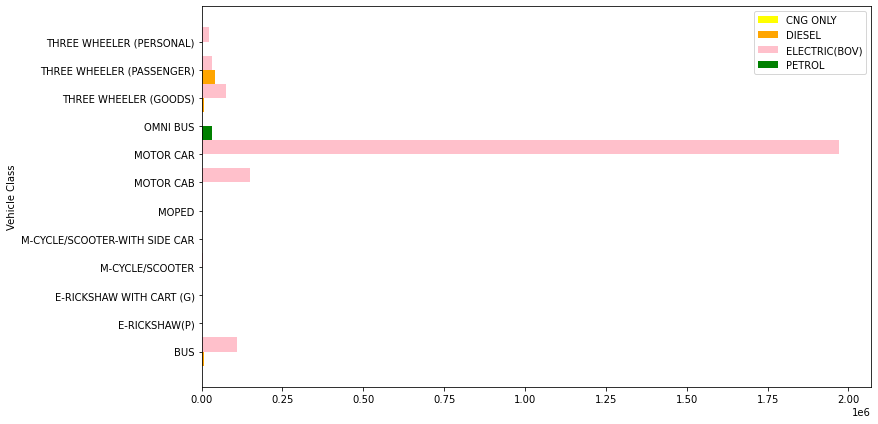

In [25]:
mh.plot.barh(x = 'Vehicle Class', color=("yellow", "orange", "pink", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

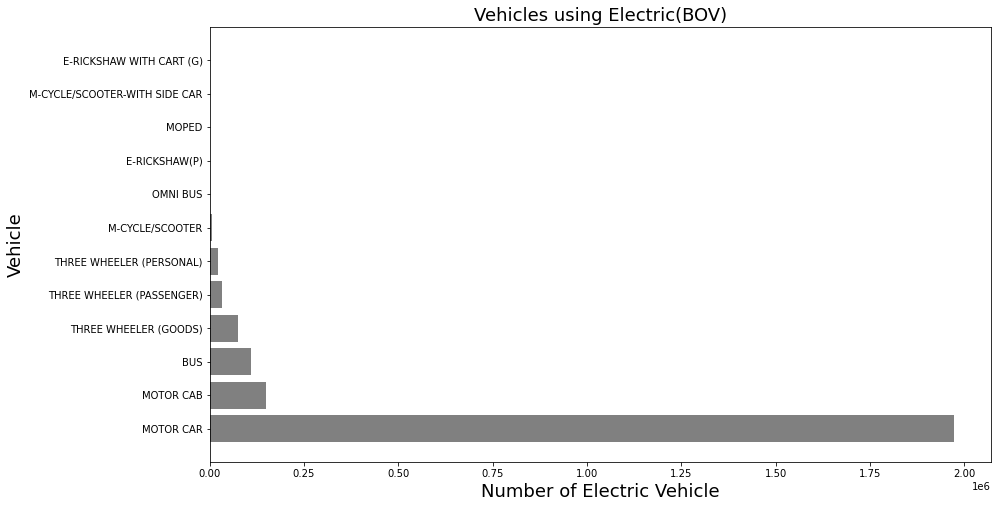

In [26]:
plot_frequency(mh,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

- **For the maharashtra state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Uttar Pradesh:

In [27]:
up = get_imp_vehicle("type_UP.xlsx")

<AxesSubplot:ylabel='Vehicle Class'>

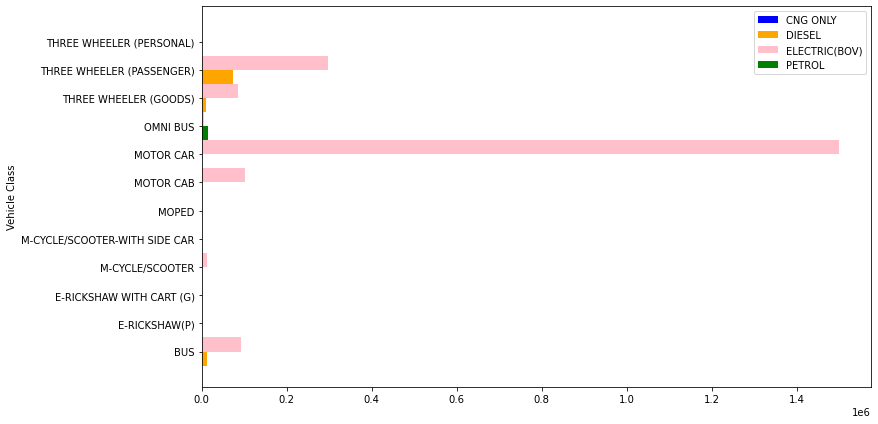

In [28]:
up.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "pink", "green"), figsize = (12,7), width = 2.0)

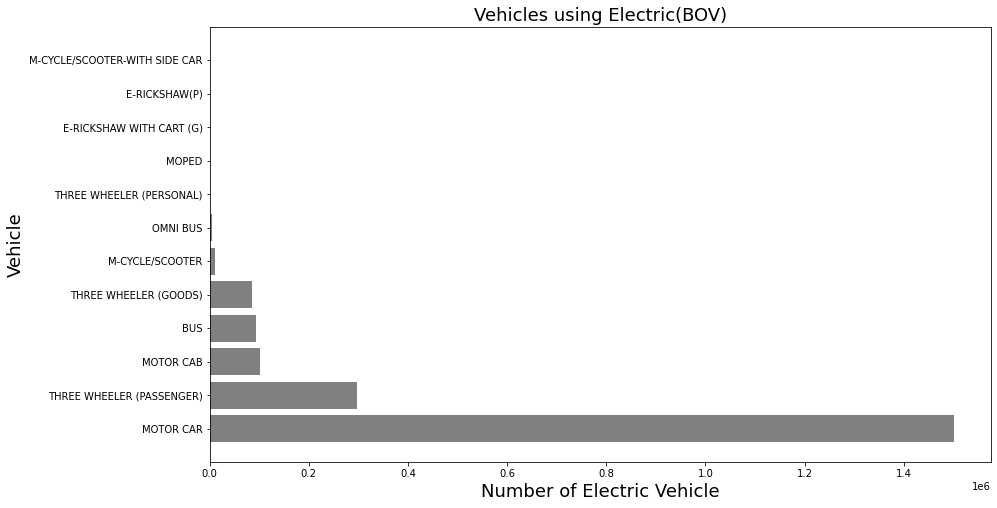

In [29]:
plot_frequency(up,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Delhi:

In [30]:
ap = get_imp_vehicle("type_Delhi.xlsx")

<AxesSubplot:ylabel='Vehicle Class'>

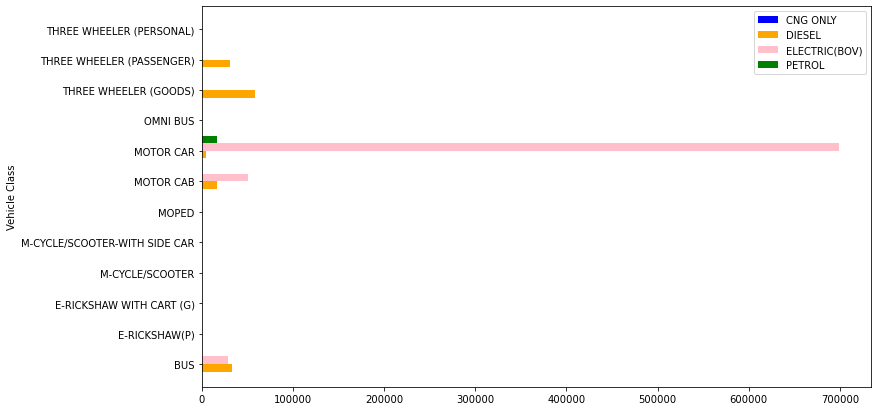

In [31]:
ap.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "pink", "green"), figsize = (12,7), width = 1.0)

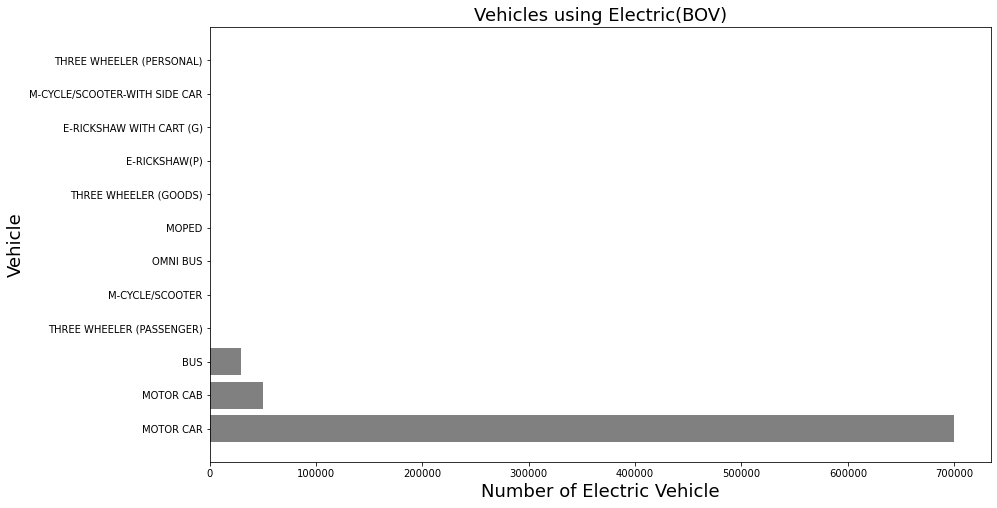

In [32]:
plot_frequency(ap,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Karnataka:

In [33]:
tn = get_imp_vehicle("type_karnataka.xlsx")

<AxesSubplot:ylabel='Vehicle Class'>

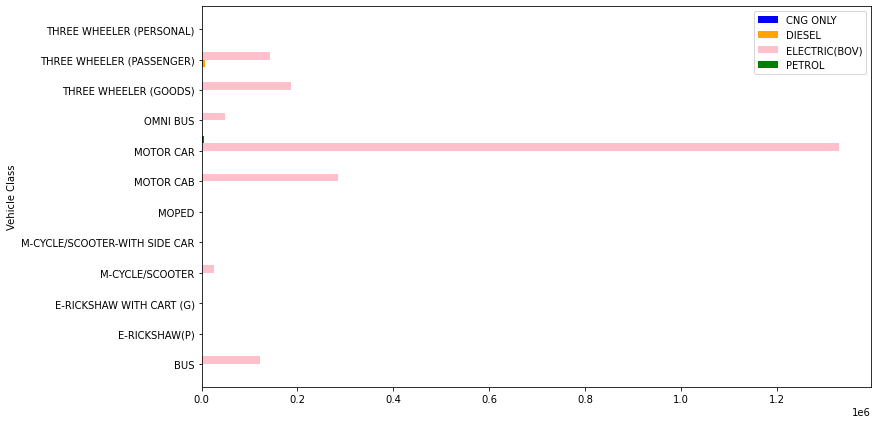

In [34]:
tn.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "pink", "green"), figsize = (12,7), width = 1.0)

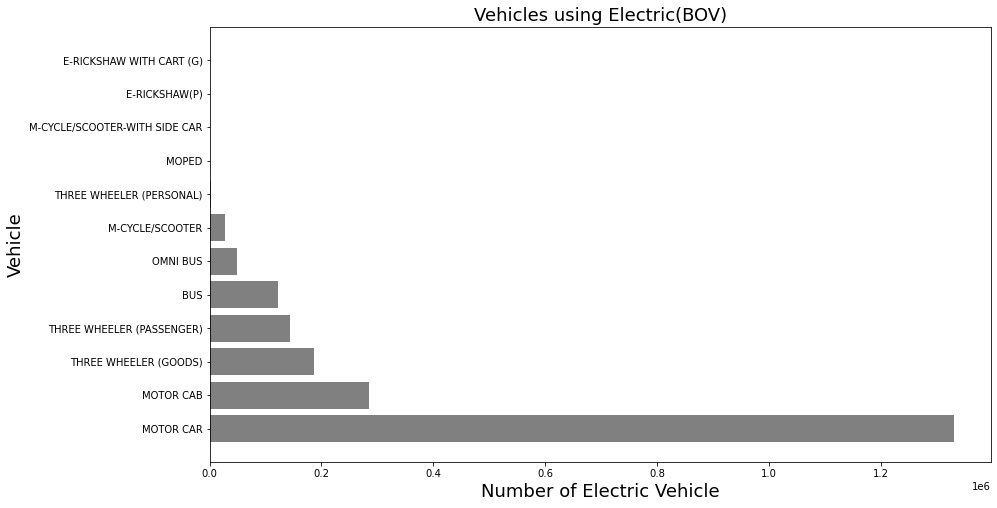

In [35]:
plot_frequency(tn,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Gujarat:

In [36]:
gj = get_imp_vehicle("type_guj.xlsx")

<AxesSubplot:ylabel='Vehicle Class'>

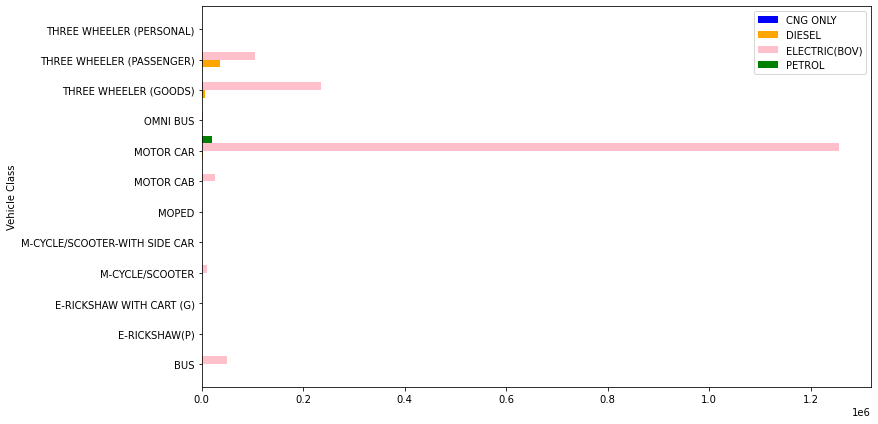

In [37]:
gj.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "pink", "green"), figsize = (12,7), width = 1.0)

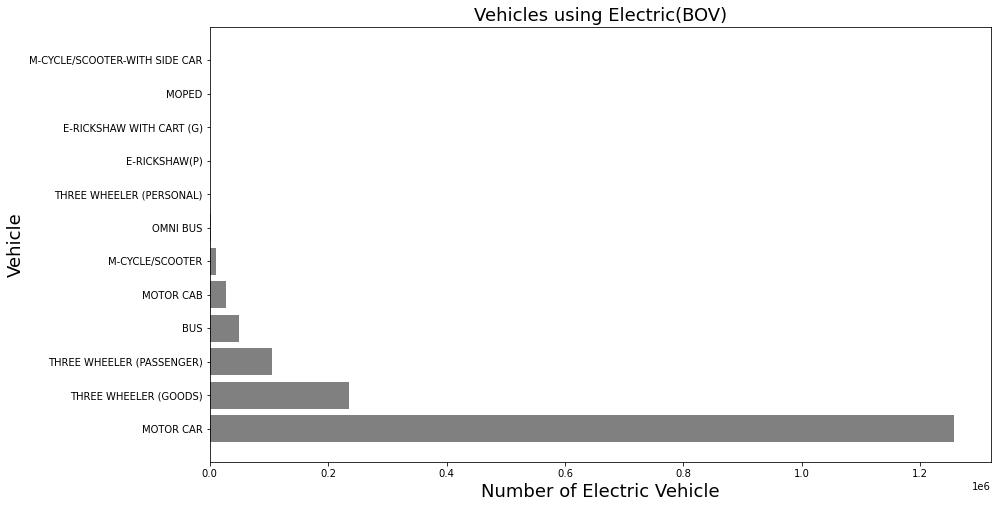

In [38]:
plot_frequency(gj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Rajasthan:

In [39]:
rj = get_imp_vehicle("type_rajasthan.xlsx")

<AxesSubplot:ylabel='Vehicle Class'>

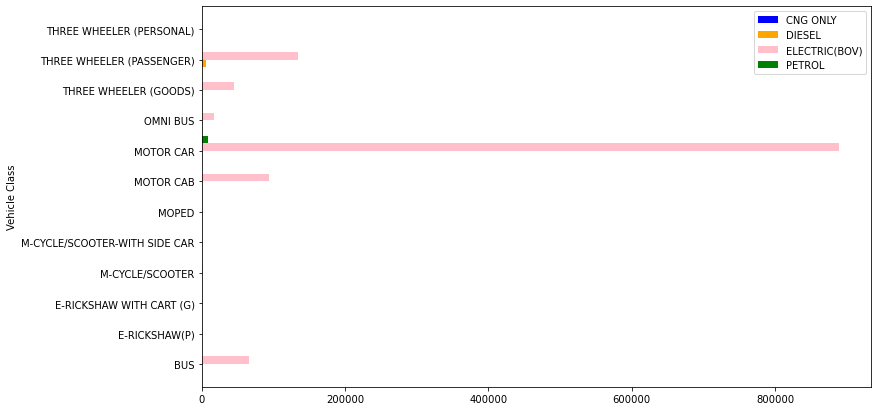

In [40]:
rj.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "pink", "green"), figsize = (12,7), width = 1.0)

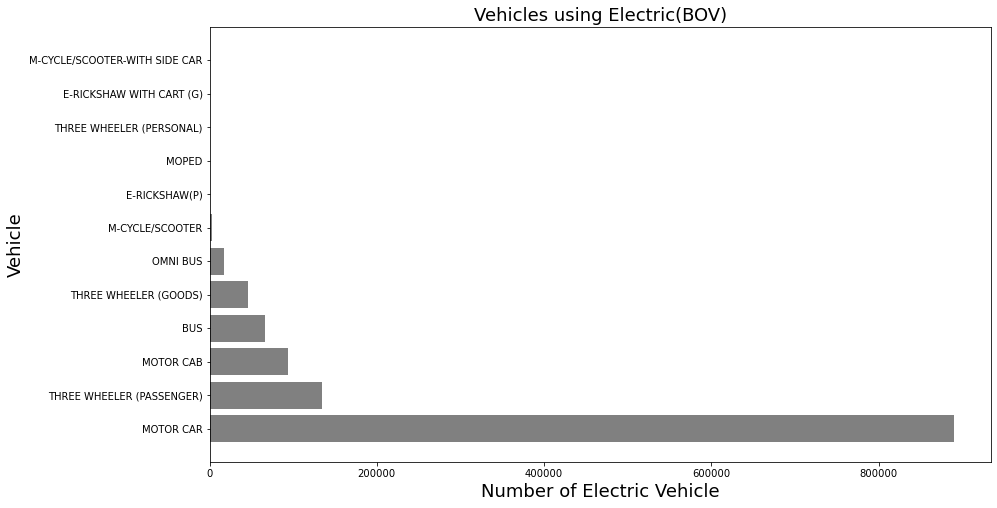

In [41]:
plot_frequency(rj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Haryana:

In [42]:
h = get_imp_vehicle("type_haryana.xlsx")

<AxesSubplot:ylabel='Vehicle Class'>

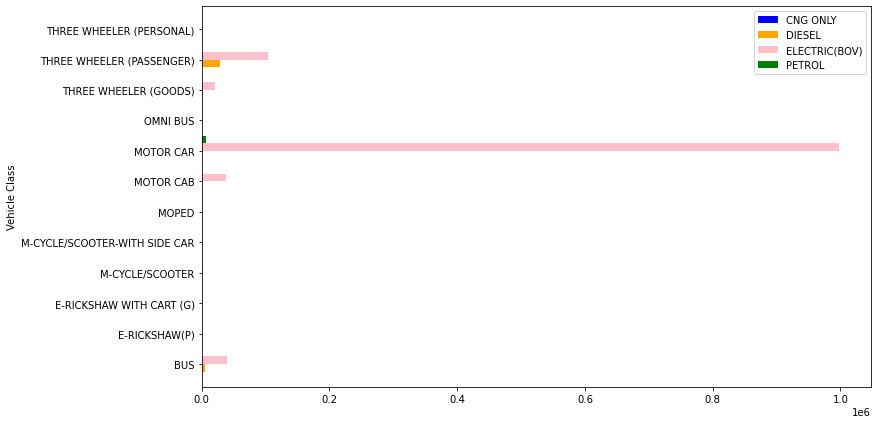

In [43]:
h.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "pink", "green"), figsize = (12,7), width = 1.0)

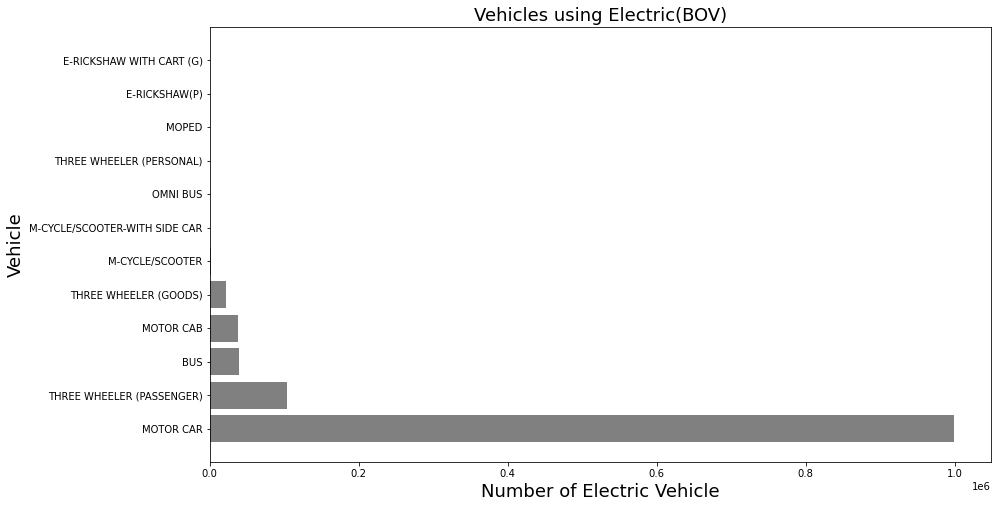

In [44]:
plot_frequency(h,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Number of EV in India:

In [45]:
mm = pd.read_csv("mean.csv")

In [46]:
mm.head() # this dataframe contains all states and the corresponding average number of EV being used

,Sl. No.,State/ UT,ELECTRIC(BOV)
0,1,Andhra Pradesh,1058.833300
1,2,Assam,5865.083330
2,3,Bihar,7627.416667
3,4,Chandigarh,281.272727
4,5,Chhatisgarh,1860.250000


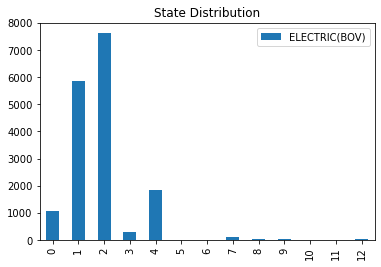

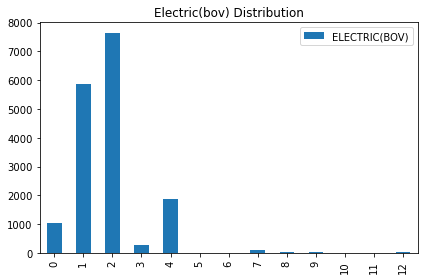

In [47]:

# Select the columns of interest
columns_of_interest = ['State/ UT', 'ELECTRIC(BOV)']
selected_data = mm[columns_of_interest]

# Count the occurrences of each value in the 'State' column
state_counts = selected_data['State/ UT'].value_counts()

# Count the occurrences of each value in the 'Electric(bov)' column
electric_counts = selected_data['ELECTRIC(BOV)'].value_counts()

# Plot the bar chart for 'State'
# plt.subplot(1, 2, 1)
selected_data.plot(kind='bar')
plt.title('State Distribution')

# Plot the bar chart for 'Electric(bov)'
# plt.subplot(1, 2, 2)
selected_data.plot(kind='bar')
plt.title('Electric(bov) Distribution')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the chart
plt.show()


# Charging Stations Sanctioned:

- The above plots also confirm the same states which were intially planned to target.

# Resources for datasets used:

- https://data.gov.in/
- https://vahan.parivahan.gov.in/vahan4dashboard/vahan/view/reportview.xhtml
- https://www.kaggle.com/datasets?search=+EV+market+data